## Import statements

In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import torchvision
from torchvision import transforms
import os
from datetime import datetime  # For generating timestamped folder names
from model import *
from data import *
from utils import *
from train import *
from tqdm.auto import tqdm
import os

# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Hyperparameters & Dataset loading

In [3]:
params = {
    'batch_size': 32,
    'learning_rate': 0.0013,
    'save_dir': 'model_ckpts'
}

In [4]:
#Normal case
train_data_loader = create_train_data_loader(params["batch_size"])

#num instances ranging from 1,10,100,1000
train_data_num_1_loader = create_train_data_loader_with_num_instances(1, params["batch_size"])
train_data_num_10_loader = create_train_data_loader_with_num_instances(10, params["batch_size"])
train_data_num_100_loader = create_train_data_loader_with_num_instances(100, params["batch_size"])
train_data_num_1000_loader = create_train_data_loader_with_num_instances(1000, params["batch_size"])

#Testing and validation for all cases
test_data_loader, validation_data_loader = create_test_and_validation_data_loader(params["batch_size"])


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
def get_model_weight_path(experiment, epoch_num=None):
    directory = os.path.join(params["save_dir"], experiment)
    if epoch_num == None:
        # Get a list of all files in the directory
        files = os.listdir(directory)

        # Filter out only the files (exclude directories)
        files = [f for f in files if os.path.isfile(os.path.join(directory, f))]

        # Sort the files by their modification time in descending order (most recent first)
        files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)

        # Get the name of the most recently added file
        model_file = files[0] if files else None
    else:
        model_file = f"model_epoch_{epoch_num}.pt"
    return os.path.join(directory, experiment, model_file)


# <u>Experiment 1: Full dataset</u>

### 1.1 Train the model

In [6]:
full_experiment = "full"
full_cifar_model = CIFARClassifier()
full_cifar_model.to(device)

CIFARClassifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (res_blocks): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, trac

In [7]:
# checkpoint = get_model_weight_path(full_experiment)
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    30,
    params,
    full_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.1865932632545135 | train_accuracy: 0.25868 | val_loss: 2.103141500836327 | val_accuracy: 0.3475 


Epoch 2/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.1070121031728832 | train_accuracy: 0.345 | val_loss: 2.0686236468572465 | val_accuracy: 0.381 


Epoch 3/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 3: train_loss: 2.0567890407180296 | train_accuracy: 0.39684 | val_loss: 2.00625403154464 | val_accuracy: 0.451 


Epoch 4/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 4: train_loss: 2.021863561216563 | train_accuracy: 0.4339 | val_loss: 1.9833501709832086 | val_accuracy: 0.4745 


Epoch 5/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.9872107596559092 | train_accuracy: 0.46888 | val_loss: 1.9449262562252225 | val_accuracy: 0.5095 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\full\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.9656726671043148 | train_accuracy: 0.49132 | val_loss: 1.9320480634295751 | val_accuracy: 0.5215 


Epoch 7/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.946186634263242 | train_accuracy: 0.51106 | val_loss: 1.9078653956216478 | val_accuracy: 0.546 


Epoch 8/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.928026316719641 | train_accuracy: 0.52958 | val_loss: 1.9062264192672003 | val_accuracy: 0.5535 


Epoch 9/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.914676120856292 | train_accuracy: 0.54444 | val_loss: 1.8622071440257724 | val_accuracy: 0.5975 


Epoch 10/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.8992222684816298 | train_accuracy: 0.5585 | val_loss: 1.874450511402554 | val_accuracy: 0.5835 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\full\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.8887129991541134 | train_accuracy: 0.5686 | val_loss: 1.8428114425568354 | val_accuracy: 0.615 


Epoch 12/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.8788240441739064 | train_accuracy: 0.5789 | val_loss: 1.8560091767992293 | val_accuracy: 0.6015 


Epoch 13/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.8688233247263952 | train_accuracy: 0.58892 | val_loss: 1.830087211396959 | val_accuracy: 0.6295 


Epoch 14/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.859042114732514 | train_accuracy: 0.59926 | val_loss: 1.8455182635594929 | val_accuracy: 0.6155 


Epoch 15/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.851709163577909 | train_accuracy: 0.60656 | val_loss: 1.8111079268985324 | val_accuracy: 0.649 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\full\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.844451367054242 | train_accuracy: 0.61354 | val_loss: 1.7984361440416365 | val_accuracy: 0.659 


Epoch 17/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.8389263349088887 | train_accuracy: 0.61924 | val_loss: 1.7818849124605693 | val_accuracy: 0.6755 


Epoch 18/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.8337951770442003 | train_accuracy: 0.62486 | val_loss: 1.7803443443207514 | val_accuracy: 0.677 


Epoch 19/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.8263306803834491 | train_accuracy: 0.63218 | val_loss: 1.77690205119905 | val_accuracy: 0.6785 


Epoch 20/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.820892701832362 | train_accuracy: 0.63802 | val_loss: 1.7713427600406466 | val_accuracy: 0.686 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\full\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.8137353413850927 | train_accuracy: 0.64488 | val_loss: 1.7861403264696636 | val_accuracy: 0.6715 


Epoch 22/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.8088956725040615 | train_accuracy: 0.64944 | val_loss: 1.7709117068184748 | val_accuracy: 0.691 


Epoch 23/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 23: train_loss: 1.8051102385639917 | train_accuracy: 0.65382 | val_loss: 1.781320335373046 | val_accuracy: 0.68 


Epoch 24/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 24: train_loss: 1.79964514924255 | train_accuracy: 0.6585 | val_loss: 1.753385343248882 | val_accuracy: 0.7075 


Epoch 25/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 25: train_loss: 1.794149064209243 | train_accuracy: 0.66502 | val_loss: 1.7483258247375488 | val_accuracy: 0.7125 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\full\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 26: train_loss: 1.7901390537724462 | train_accuracy: 0.6688 | val_loss: 1.7652715198577396 | val_accuracy: 0.6955 


Epoch 27/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 27: train_loss: 1.7855299650211787 | train_accuracy: 0.67408 | val_loss: 1.7450528258369082 | val_accuracy: 0.713 


Epoch 28/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 28: train_loss: 1.7791839440663655 | train_accuracy: 0.67954 | val_loss: 1.7518611635480608 | val_accuracy: 0.706 


Epoch 29/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 29: train_loss: 1.778225813320792 | train_accuracy: 0.68084 | val_loss: 1.740862700674269 | val_accuracy: 0.7185 


Epoch 30/30:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch 30: train_loss: 1.7734543516783858 | train_accuracy: 0.68556 | val_loss: 1.751191841231452 | val_accuracy: 0.708 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\full\model_epoch_30.pt


### 1.2 Test the model

In [13]:
full_cifar_test_accuracy, full_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, full_cifar_model, test_data_loader)
print(f"Test loss: {full_cifar_test_loss} | Test accuracy: {full_cifar_test_accuracy}")

Test loss: 1.7260771822929382 | Test accuracy: 0.733375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


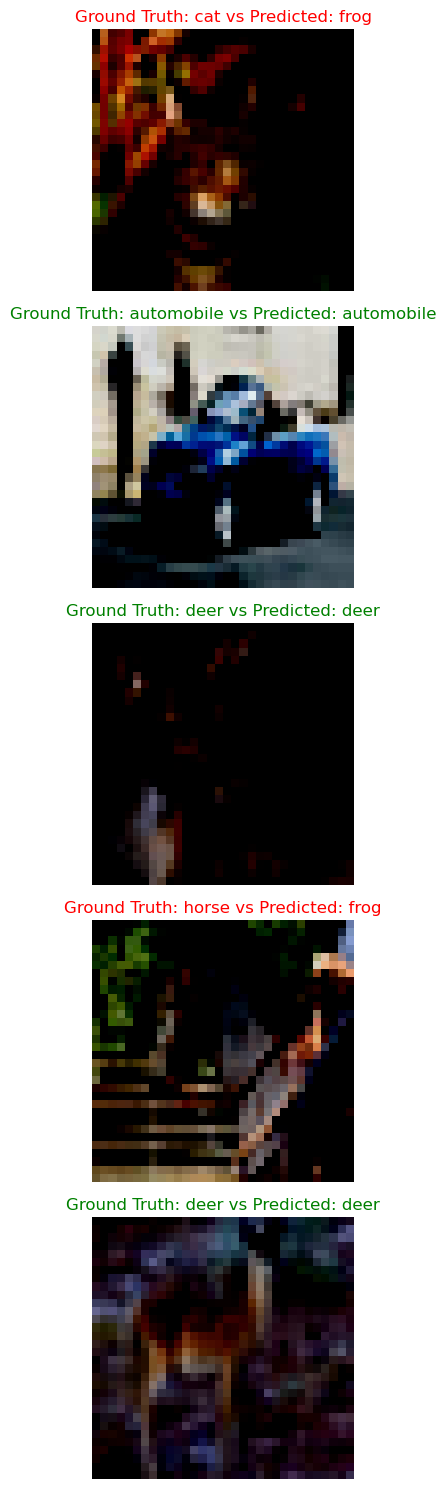

In [14]:
show_predictions(full_cifar_model, test_data_loader)

### 1.3 Plot graphs

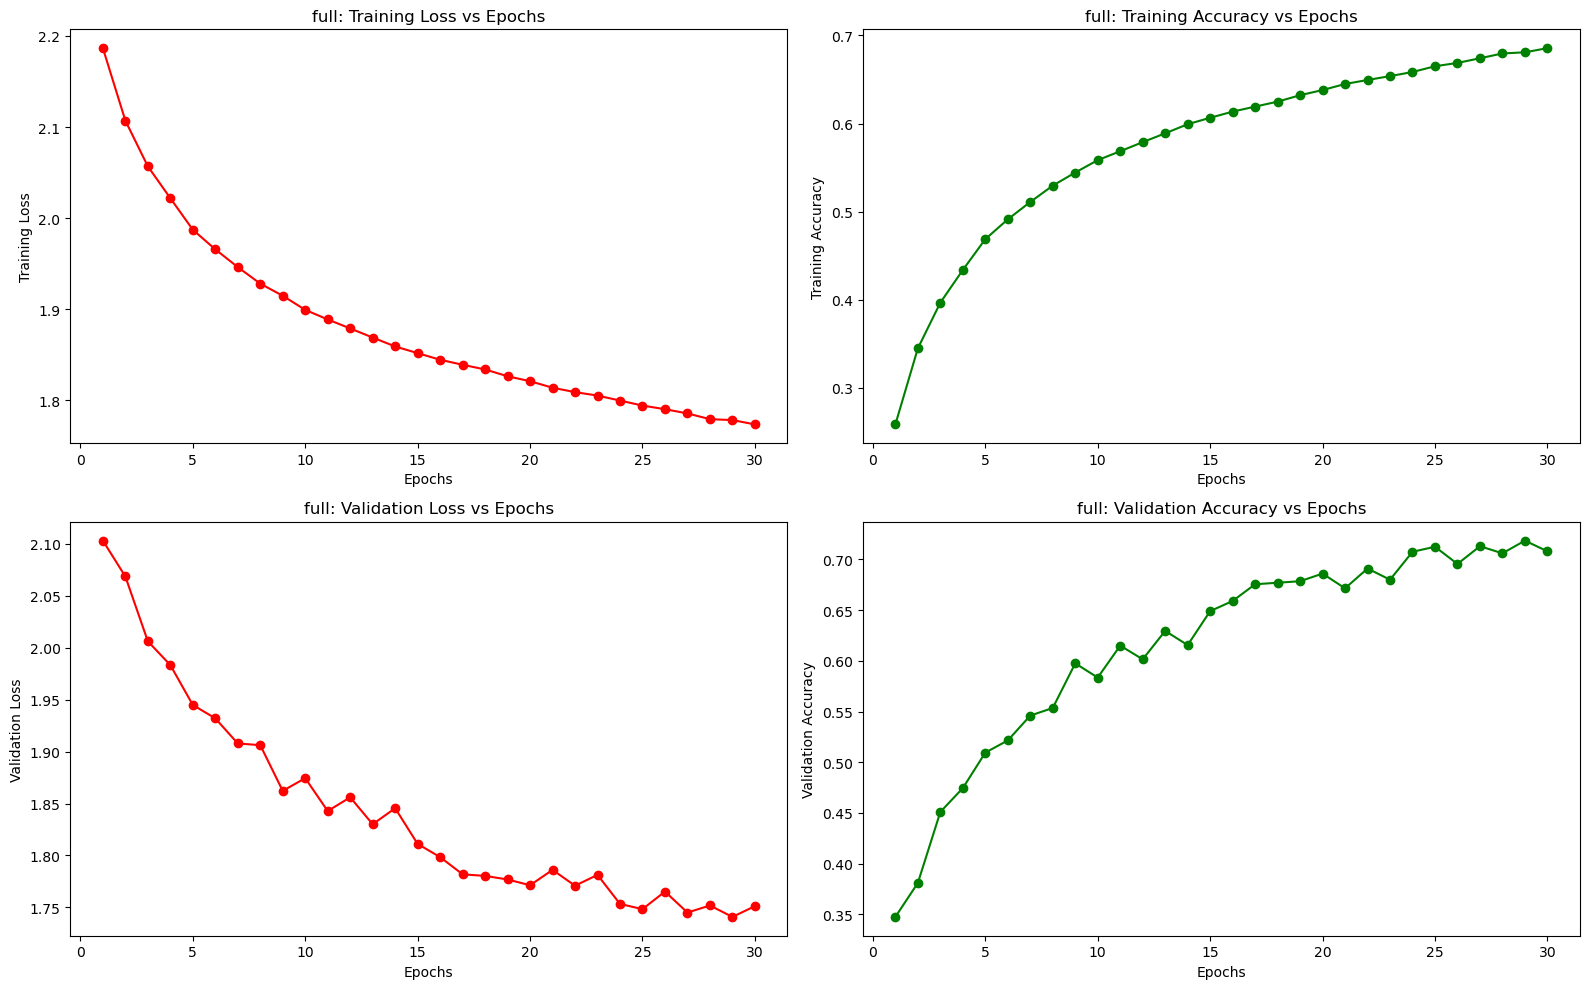

In [15]:
plot_model_training_stats(full_experiment, full_epoch_numbers, full_training_losses, full_validation_losses, full_training_accuracy, full_validation_accuracy)

# <u>Experiment 2: 1 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model

### 1.3 Plot graphs

# <u>Experiment 3: 10 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model


### 1.3 Plot graphs

# <u>Experiment 4: 100 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model

### 1.3 Plot graphs

# <u>Experiment 5: 1000 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model

### 1.3 Plot graphs

# <u> INTERPRETATION </u>